In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)
library("ggplot2")# note that Seurat v3, they return ggplot object for easy customization
library(parallel)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [684]:
Merfish<-read.csv(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/Moffitt_and_Bambah-Mukku_et_al_merfish_all_cells.csv")

In [685]:
merfish<-subset(Merfish,Cell_class=="Inhibitory"| Cell_class=="Excitatory")

In [6]:
unique(merfish$Behavior)

[1] Naive               Parenting           Virgin Parenting   
[4] Aggression to pup   Aggression to adult Mating             
6 Levels: Aggression to adult Aggression to pup Mating Naive ... Virgin Parenting

In [686]:
merfish_F_Mate<-subset(merfish,Behavior=="Mating" & Animal_sex=="Female")
merfish_F_Parenting<-subset(merfish,Behavior=="Virgin Parenting" & Animal_sex=="Female")
merfish_M_Mate<-subset(merfish,Behavior=="Mating" & Animal_sex=="Male")
merfish_M_Aggression<-subset(merfish,Behavior=="Aggression to adult" & Animal_sex=="Male")

In [688]:
merfish_F_Mate<-as.data.frame(t(merfish_F_Mate[,10:170]))
merfish_F_Parenting<-as.data.frame(t(merfish_F_Parenting[,10:170]))
merfish_M_Mate<-as.data.frame(t(merfish_M_Mate[,10:170]))
merfish_M_Aggression<-as.data.frame(t(merfish_M_Aggression[,10:170]))

In [689]:
colnames(merfish_F_Mate) = paste0(colnames(merfish_F_Mate),"Mate_female")
merfish_F_Mate<- CreateSeuratObject(counts = merfish_F_Mate, project = "MPOA")
merfish_F_Mate@meta.data$stim <- "Mate"
merfish_F_Mate@meta.data$sex <- "female"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [690]:
colnames(merfish_F_Parenting) = paste0(colnames(merfish_F_Parenting),"Parenting_female")
merfish_F_Parenting<- CreateSeuratObject(counts = merfish_F_Parenting, project = "MPOA")
merfish_F_Parenting@meta.data$stim <- "Parenting"
merfish_F_Parenting@meta.data$sex <- "female"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [691]:
colnames(merfish_M_Mate) = paste0(colnames(merfish_M_Mate),"Mate_male")
merfish_M_Mate<- CreateSeuratObject(counts = merfish_M_Mate,project = "MPOA")
merfish_M_Mate@meta.data$stim <- "Mate"
merfish_M_Mate@meta.data$sex <- "male"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [692]:
colnames(merfish_M_Aggression) = paste0(colnames(merfish_M_Aggression),"Aggression_male")
merfish_M_Aggression<- CreateSeuratObject(counts = merfish_M_Aggression,project = "MPOA")
merfish_M_Aggression@meta.data$stim <- "Aggression"
merfish_M_Aggression@meta.data$sex <- "male"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [693]:
merfish_F_Mate<- NormalizeData(object = merfish_F_Mate,verbose = FALSE) 
merfish_F_Parenting<- NormalizeData(object = merfish_F_Parenting,verbose = FALSE) 
merfish_M_Mate<- NormalizeData(object = merfish_M_Mate,verbose = FALSE) 
merfish_M_Aggression<- NormalizeData(object = merfish_M_Aggression,verbose = FALSE) 

In [694]:
merfish_F_Mate <- FindVariableFeatures(merfish_F_Mate, selection.method = "vst")
merfish_F_Parenting <- FindVariableFeatures(merfish_F_Parenting, selection.method = "vst")
merfish_M_Mate <- FindVariableFeatures(merfish_M_Mate, selection.method = "vst")
merfish_M_Aggression <- FindVariableFeatures(merfish_M_Aggression, selection.method = "vst")

In [695]:
length(VariableFeatures(merfish_F_Mate))
length(VariableFeatures(merfish_F_Parenting))

[1] 161

[1] 161

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
When using repel, set xnudge and ynudge to 0 for optimal results



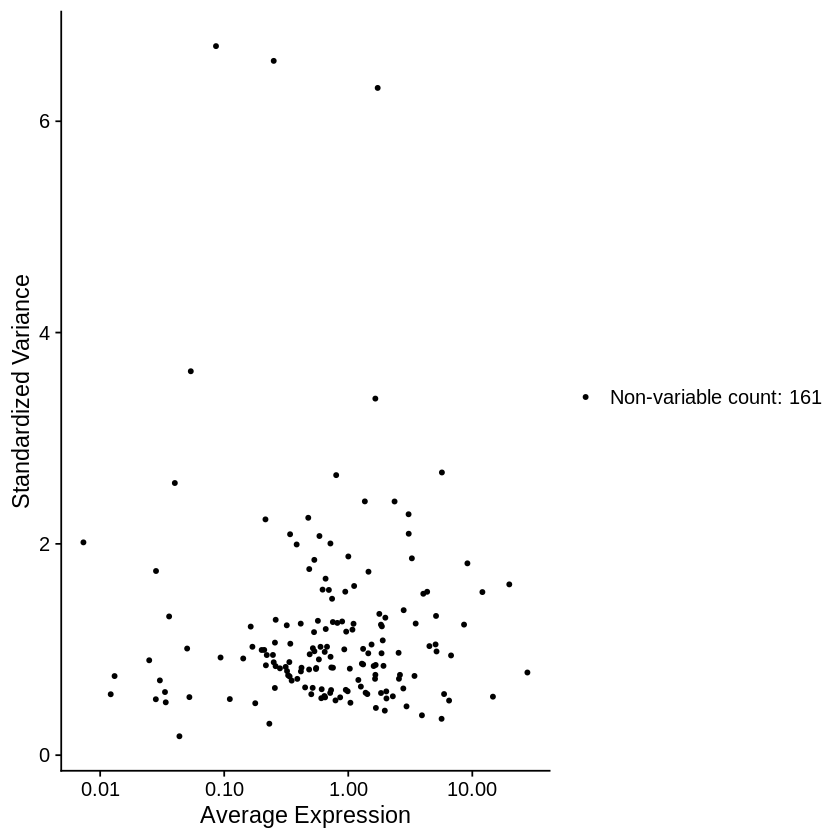

In [18]:
top100 <- head(VariableFeatures(merfish_F_Mate), 100)
plot1 <- VariableFeaturePlot(merfish_F_Mate)
plot2 <- LabelPoints(plot = plot1, points = top100, repel = TRUE)

In [696]:
gene<-head(VariableFeatures(merfish_F_Mate), 60)
gene<- gene[gene != "Fos"]

In [697]:
VariableFeatures(merfish_F_Mate)<-gene
VariableFeatures(merfish_F_Parenting)<-gene
VariableFeatures(merfish_M_Mate)<-gene
VariableFeatures(merfish_M_Aggression)<-gene

In [698]:
merfish.list<-objects()
merfish.list$merfish_F_Mate<-merfish_F_Mate
merfish.list$merfish_F_Parenting<-merfish_F_Parenting
merfish.list$merfish_M_Mate<-merfish_M_Mate
merfish.list$merfish_M_Aggression<-merfish_M_Aggression

reference.list <- merfish.list[c("merfish_F_Mate","merfish_F_Parenting","merfish_M_Mate","merfish_M_Aggression")]
merfish.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:40)
merfish.integrated <- IntegrateData(anchorset = merfish.anchors, dims = 1:40)

Warning message in merfish.list$merfish_F_Mate <- merfish_F_Mate:
“Coercing LHS to a list”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 102551 anchors

Filtering anchors

	Retained 71001 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 85005 anchors

Filtering anchors

	Retained 62449 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 110429 anchors

Filtering anchors

	Retained 82802 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 84210 anchors

Filtering anchors

	Retained 61937 anchors

Extracting within-dataset neighbors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 109505 anchors

Filtering anchor

In [699]:
DefaultAssay(object = merfish.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering
merfish.integrated <- ScaleData(object = merfish.integrated, verbose = FALSE)
merfish.integrated <- RunPCA(object = merfish.integrated, npcs = 40, verbose = FALSE)
merfish.integrated <- RunUMAP(object = merfish.integrated, reduction = "pca", dims = 1:40)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
20:09:24 UMAP embedding parameters a = 0.9922 b = 1.112

20:09:24 Read 133113 rows and found 40 numeric columns

20:09:24 Using Annoy for neighbor search, n_neighbors = 30

20:09:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

20:09:42 Writing NN index file to temp file /tmp/RtmpJkxqbJ/file55784b6015e

20:09:42 Searching Annoy index using 1 thread, search_k = 3000

20:10:45 Annoy recall = 100%

20:10:46 Commencing smooth kNN distance calibration using 1 thread

20:10:51 Initializing from normalized Laplacian + noise

20:10:55 Commencing optimization for 200 epochs, with 5756926 positive edges

20:11:48 Optimiza

In [702]:
merfish.integrated<- FindNeighbors(object = merfish.integrated)
merfish.integrated<- FindClusters(merfish.integrated, resolution = 1.0, dims = 1:40)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The following arguments are not used: dims”
Warning message:
“The following arguments are not used: dims”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 133113
Number of edges: 2913790

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7808
Number of communities: 19
Elapsed time: 45 seconds


In [703]:
saveRDS(merfish.integrated, file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/MERFISH_60.rds")

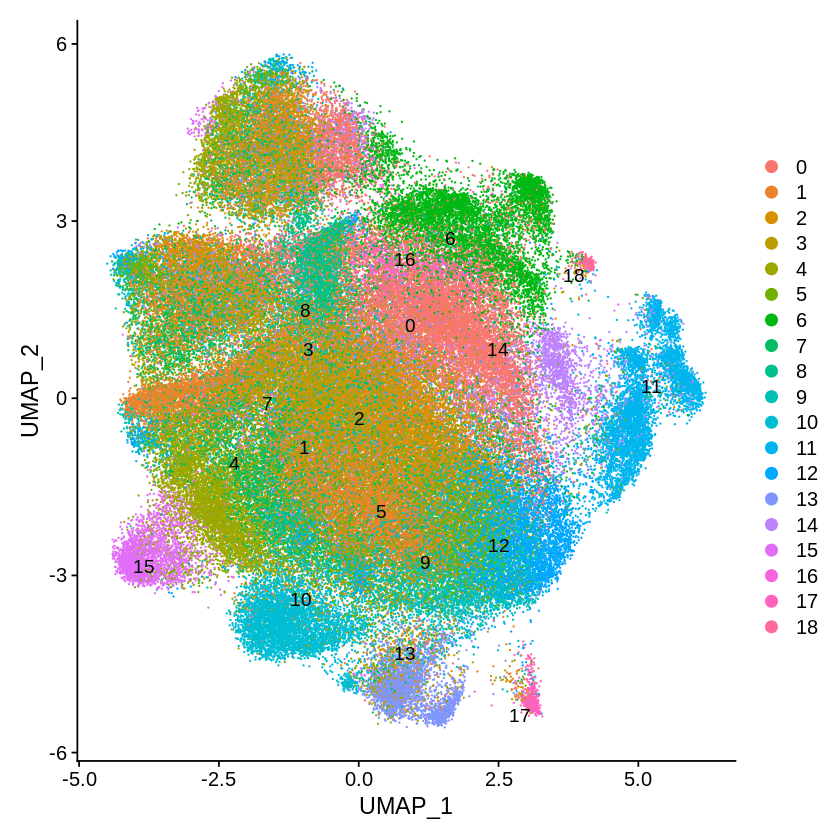

In [704]:
DimPlot(object = merfish.integrated, reduction = "umap", group.by = "integrated_snn_res.1", label = TRUE, repel = TRUE) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/Neurons_umap_number_2000_40_60.pdf",width=10,height=10)

In [705]:
DefaultAssay(merfish.integrated) <- "RNA"

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: Slc32a1, Moxd1”


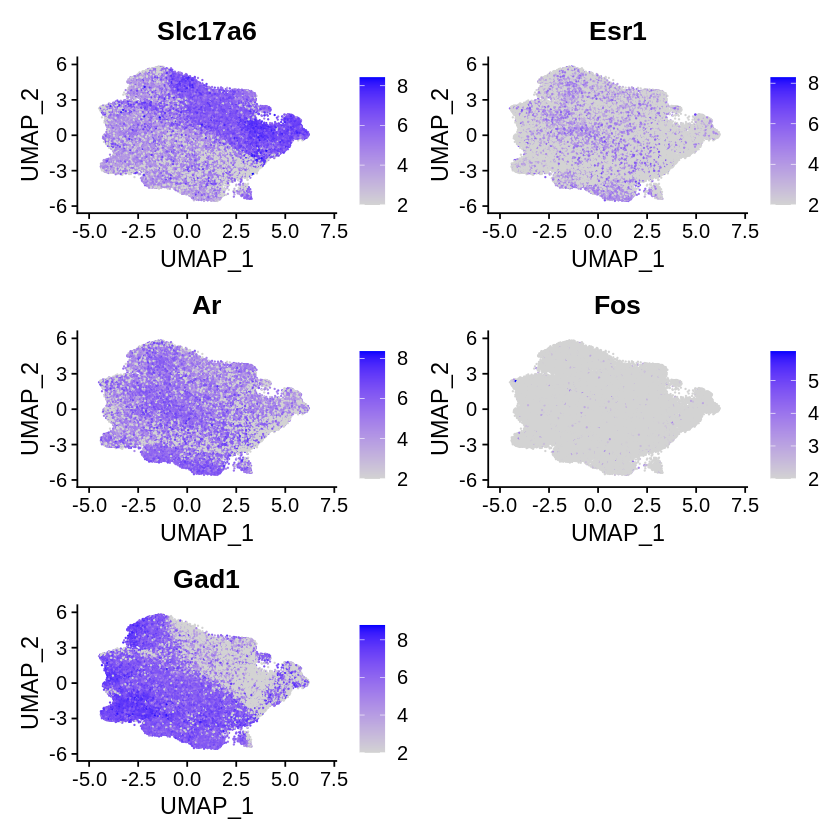

In [706]:
FeaturePlot(object =merfish.integrated, features = c("Slc17a6","Esr1","Ar","Slc32a1","Fos","Gad1","Moxd1"),min.cutoff = 2)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/feature_example_60.pdf",width=10,height=10)

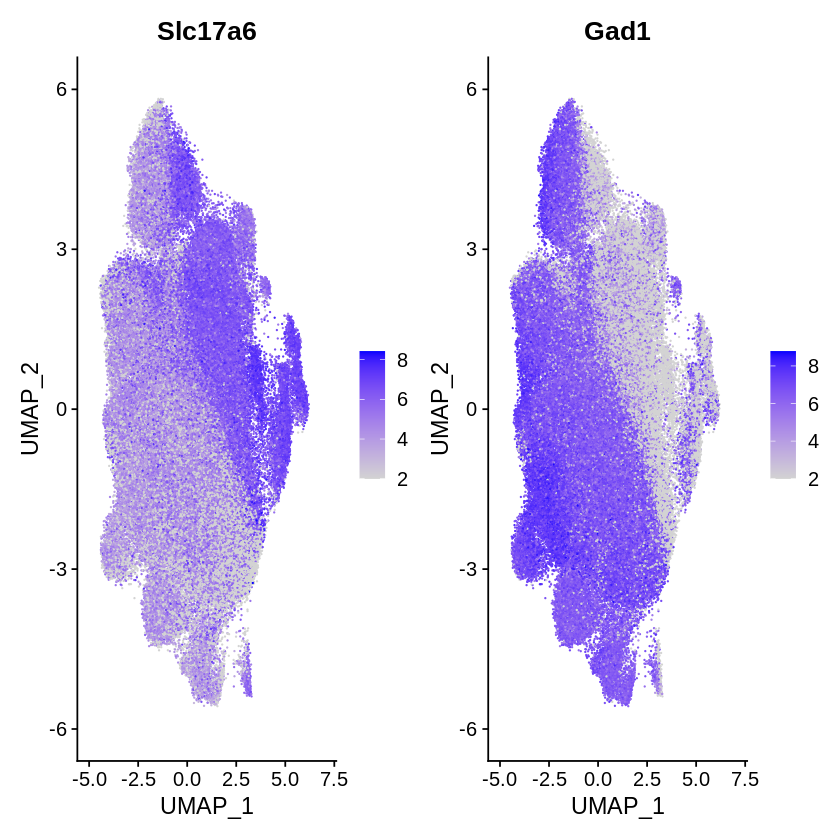

In [707]:
FeaturePlot(object =merfish.integrated, features = c("Slc17a6","Gad1"),min.cutoff = 2)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/gad1_vglutest60.pdf",width=10,height=10)

In [2]:
merfish.integrated<-readRDS("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/MERFISH_60.rds")

In [3]:
new.ident <- c("mVglu1","mVgat1","mVgat2","mVgat3","mVgat4","mVgat5","mVglu2","mVgat6","mVgat7","mVgat8","mVgat9","mVglu3","low","mVgat10","mVglu4","mVgat11","mVglu5","mVglu6","Mix1")#60
names(x = new.ident) <- levels(x =merfish.integrated)
merfish.integrated<- RenameIdents(object =merfish.integrated, new.ident)

In [4]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(merfish.integrated@assays$RNA@data[,which(Idents(object=merfish.integrated) %in% new.ident[i])]))}

# Disc plot

In [399]:
gender<-"female"  #male or female needs to match with group
merfish.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/MERFISH_60.rds")
new.ident <- c("mVglu1","mVgat1","mVgat2","mVgat3","mVgat4","mVgat5","mVglu2","mVgat6","mVgat7","mVgat8","mVgat9","mVglu3","low","mVgat10","mVglu4","mVgat11","mVglu5","mVglu6","Mix1")#60
names(x = new.ident) <- levels(x =merfish.integrated)
merfish.integrated<- RenameIdents(object =merfish.integrated, new.ident)
merfish.integrated<-subset(merfish.integrated,cells=rownames(subset(merfish.integrated@meta.data,sex==gender)))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(merfish.integrated@assays$RNA@data[,which(Idents(object=merfish.integrated) %in% new.ident[i])]))}

In [400]:
#Cell_type<-rev(c("mVgat8","mVgat9","mVgat1","mVgat10","mVgat3","mVgat12","mVgat11","mVgat4","mVgat6","mVgat7","mVgat2","mVglu2","mVglu3","mVglu5","mVglu6","mVglu1","mVglu4","mVglu7"))#80
#Cell_type<-rev(c("mVgat9","mVgat10","mVgat2","mVgat7","mVgat3","mVgat5","mVgat1","mVgat4","mVgat8","mVgat6")) #male
Cell_type<-rev(c("mVgat9","mVgat2","mVgat7","mVgat3","mVgat10","mVgat5","mVgat1","mVgat4","mVgat8","mVgat6")) #female
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-rev(c("Gad1","Slc17a6","Esr1","Ar"))

In [401]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=c(rep(gene_list[i],L)))
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(merfish.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(merfish.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(merfish.integrated@assays$RNA@data[gene_list[i],]))/sd(merfish.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] mVgat6  mVgat8  mVgat4  mVgat1  mVgat5  mVgat10 mVgat3  mVgat7  mVgat2 
[10] mVgat9  mVgat6  mVgat8  mVgat4  mVgat1  mVgat5  mVgat10 mVgat3  mVgat7 
[19] mVgat2  mVgat9  mVgat6  mVgat8  mVgat4  mVgat1  mVgat5  mVgat10 mVgat3 
[28] mVgat7  mVgat2  mVgat9  mVgat6  mVgat8  mVgat4  mVgat1  mVgat5  mVgat10
[37] mVgat3  mVgat7  mVgat2  mVgat9 
10 Levels: mVgat6 mVgat8 mVgat4 mVgat1 mVgat5 mVgat10 mVgat3 mVgat7 ... mVgat9

In [402]:
library(scales)

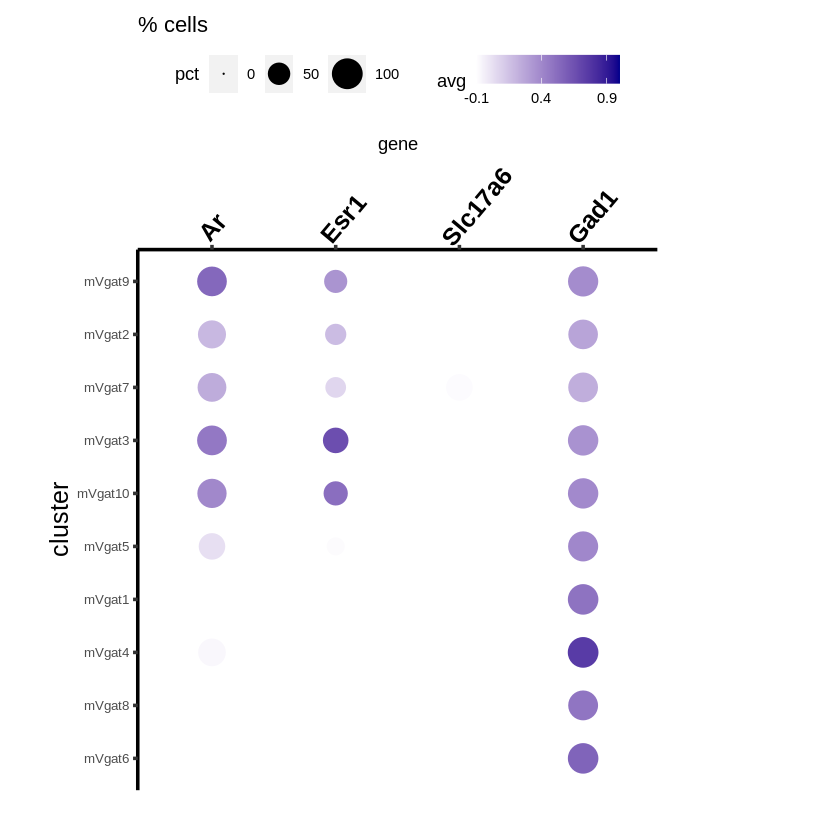

In [403]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_y_discrete(limits = (levels(Cell_number$cluster)))+scale_x_discrete(limits =rev(levels(Cell_number$gene)),position = "top")+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-0.1,1.0),breaks=seq(-0.1,1,0.5),oob=squish) +scale_size_continuous(range = c(0,8),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=15,angle = 50, hjust = 0.1,vjust=0.5,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),,legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 110,30, 30))+ggtitle("% cells")
ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/",gender,"marker_disc_60_Vgat.pdf",sep=""),height=7, width=3.9 , paper = "letter")

start from here

In [162]:
# incase you analyze male and female together to calculate correlation
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")

new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" |stim=="AF")))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
merfish.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/MERFISH_60.rds")
new.ident <- c("mVglu1","mVgat1","mVgat2","mVgat3","mVgat4","mVgat5","mVglu2","mVgat6","mVgat7","mVgat8","mVgat9","mVglu3","low","mVgat10","mVglu4","mVgat11","mVglu5","mVglu6","Mix1")#60
names(x = new.ident) <- levels(x =merfish.integrated)
merfish.integrated<- RenameIdents(object =merfish.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(merfish.integrated@assays$RNA@data[,which(Idents(object=merfish.integrated) %in% new.ident[i])]))}

In [345]:
# separately analyze male and female 
group<-"AM" # AM or AF
gender<-"male"  #male or female needs to match with group
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")

new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim==group)))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
merfish.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/MERFISH_60.rds")
new.ident <- c("mVglu1","mVgat1","mVgat2","mVgat3","mVgat4","mVgat5","mVglu2","mVgat6","mVgat7","mVgat8","mVgat9","mVglu3","low","mVgat10","mVglu4","mVgat11","mVglu5","mVglu6","Mix1")#60
names(x = new.ident) <- levels(x =merfish.integrated)
merfish.integrated<- RenameIdents(object =merfish.integrated, new.ident)
merfish.integrated<-subset(merfish.integrated,cells=rownames(subset(merfish.integrated@meta.data,sex==gender)))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(merfish.integrated@assays$RNA@data[,which(Idents(object=merfish.integrated) %in% new.ident[i])]))}

# Label transfer (log version)

In [1]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")

new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
#MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" |stim=="AF")))
#MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AF")))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

Loading required package: Seurat



In [2]:
length(VariableFeatures(object = MPOA.integrated))

[1] 0

In [3]:
#separately transfer by sex
merfish.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/MERFISH_60.rds")
new.ident <- c("mVglu1","mVgat1","mVgat2","mVgat3","mVgat4","mVgat5","mVglu2","mVgat6","mVgat7","mVgat8","mVgat9","mVglu3","low","mVgat10","mVglu4","mVgat11","mVglu5","mVglu6","Mix1")#60
names(x = new.ident) <- levels(x =merfish.integrated)
merfish.integrated<- RenameIdents(object =merfish.integrated, new.ident)
#merfish.integrated<-subset(merfish.integrated,cells=rownames(subset(merfish.integrated@meta.data,sex=="male")))
merfish.integrated<-subset(merfish.integrated,cells=rownames(subset(merfish.integrated@meta.data,sex=="female")))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(merfish.integrated@assays$RNA@data[,which(Idents(object=merfish.integrated) %in% new.ident[i])]))}

In [4]:
#using MERFISH as a reference, project MERFISH onto scRNAseq data

In [4]:
celltype<-numeric()
for(i in 1:dim(merfish.integrated@meta.data)[1]){
    celltype[i]<-new.ident[[merfish.integrated@meta.data$seurat_clusters[i]]]
}
merfish.integrated@meta.data$celltype<-celltype

In [5]:
POA.list<-objects() #maybe better using POA.list<-vector(mode = "list")
POA.list$MPOA.integrated<-MPOA.integrated
POA.list$merfish.integrated<-merfish.integrated
reference.list <- POA.list[c("MPOA.integrated","merfish.integrated")]

Warning message in POA.list$MPOA.integrated <- MPOA.integrated:
“Coercing LHS to a list”


In [6]:
#lognormalized data below
#POA.anchors <- FindTransferAnchors(reference = merfish.integrated, query = MPOA.integrated, reduction = "cca", dims = 1:30)

POA.anchors <- FindTransferAnchors(reference = merfish.integrated, query = MPOA.integrated, reduction = "cca", dims = 1:30)

Warning message in RunCCA.Seurat(object1 = reference, object2 = query, features = features, :
“Running CCA on different assays”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 10274 anchors

Filtering anchors

	Retained 9080 anchors

Extracting within-dataset neighbors



In [8]:
predictions <- TransferData(anchorset = POA.anchors, refdata = merfish.integrated$celltype, weight.reduction="cca",  dims = 1:30)
MPOA.integrated <- AddMetaData(MPOA.integrated, metadata = predictions)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [221]:
write.csv(MPOA.integrated@meta.data,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_male.csv")

In [248]:
write.csv(MPOA.integrated@meta.data,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_female.csv")

# label transfer in metadata

In [99]:
Cluster<-numeric()
for(i in 1:dim(MPOA.integrated@meta.data)[1]){
    if(MPOA.integrated@meta.data$predicted.id[i]=="mVgat9"){
        Cluster[i]<-"mVgat9"
    }else if(MPOA.integrated@meta.data$predicted.id[i]=="mVgat10"){
        Cluster[i]<-"mVgat10"
    }else if(MPOA.integrated@meta.data$predicted.id[i]=="mVgat7"){
        Cluster[i]<-"mVgat7"
    }else if (MPOA.integrated@meta.data$predicted.id[i]=="mVgat3"){
        Cluster[i]<-"mVgat3"
    }else{Cluster[i]<-"others"}
}
MPOA.integrated@meta.data$Cluster<-Cluster

In [100]:
write.csv(MPOA.integrated@meta.data,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_SCT.csv")

In [93]:
write.csv(MPOA.integrated@meta.data,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata.csv")

# Alluvial plots

In [55]:
#male

In [74]:
library(ggplot2)
library(ggalluvial)

In [86]:
#meta_merfish<-read.csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata.csv",row.names=1)
meta_merfish<-read.csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_male.csv",row.names=1)
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")

new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" |stim=="AF")))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
Cell_type<-numeric()
for(i in 1:dim(MPOA.integrated@meta.data)[1]){
    Cell_type[i]<-new.ident[[MPOA.integrated@meta.data$seurat_clusters[i]]]
}
MPOA.integrated@meta.data$Cell_type<-Cell_type

In [87]:
MPOA.integrated@meta.data<-subset(MPOA.integrated@meta.data,stim=="AM")
meta_merfish<-subset(meta_merfish,stim=="AM")
MPOA.integrated@meta.data$Cluster<-meta_merfish$predicted.id

In [88]:
#201116
MPOA_type<-rev(c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))
merfish_type<-rev(c("mVgat10","mVgat3","mVgat9","mVgat7","mVgat1","mVgat2","mVgat4","mVgat5","mVgat6","mVgat8"))

In [89]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (q in 1:length(MPOA_type)){
for (i in 1:length(merfish_type)){
L<-length(MPOA_type)
#replace "Fos" with gene of your interest
Cell_number_temp<- data.frame("merfish" =c(merfish_type[i]),"scRNAseq"=c(MPOA_type[q]))
Cell_number_temp$number<-dim(subset(MPOA.integrated@meta.data,Cell_type==MPOA_type[q] & Cluster==merfish_type[i]))[1]
Cell_number_temp$number_adjust<-dim(MPOA.integrated@meta.data)[1]*dim(subset(MPOA.integrated@meta.data,Cell_type==MPOA_type[q] & Cluster==merfish_type[i]))[1]/dim(subset(MPOA.integrated@meta.data,Cell_type==MPOA_type[q]))[1]
if(merfish_type[i]=="mVgat10" ){Cell_number_temp$behavior<-"mate"}
   else if (merfish_type[i]=="mVgat3"){Cell_number_temp$behavior<-"mate"}
    else if(merfish_type[i]=="mVgat9"){Cell_number_temp$behavior<-"aggression"}
    else{Cell_number_temp$behavior<-"other"}
Cell_number<-rbind(Cell_number_temp,Cell_number)
}}

In [90]:
Cell_number$behavior<- factor(Cell_number$behavior,levels=c("mate","aggression","other"))

Warning message:
“Ignoring unknown parameters: face”


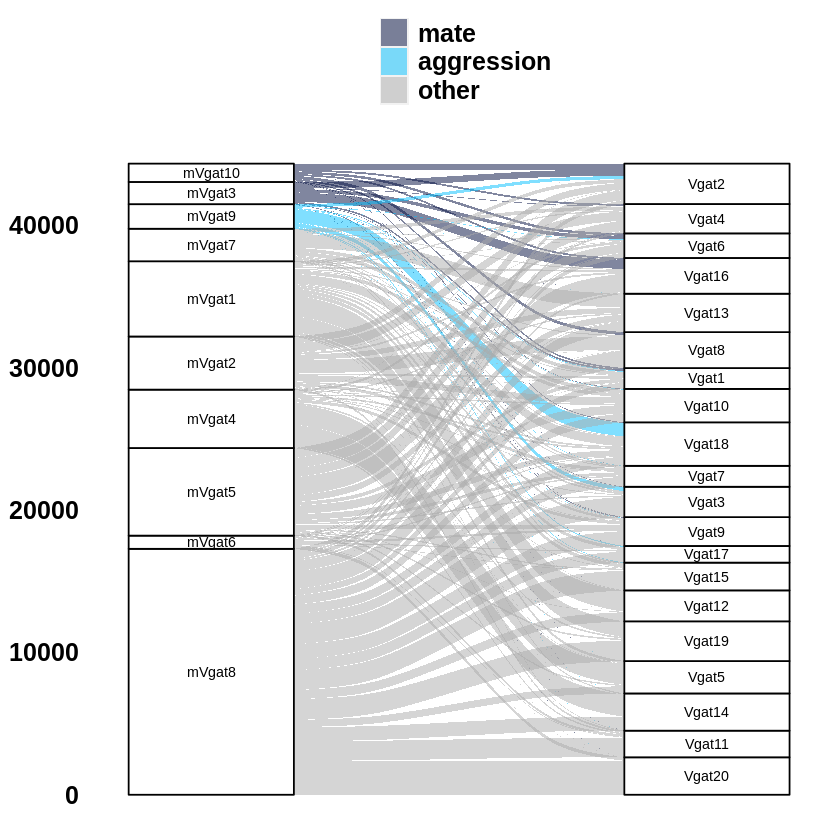

In [91]:
ggplot(data = Cell_number,
       aes(axis1 = merfish, axis2 = scRNAseq,y = number_adjust)) +
  scale_x_discrete(limits = c("merfish", "scRNAseq"), expand = c(.2, .05)) +
geom_alluvium(aes(fill = behavior)) +  
geom_stratum() +
  geom_text(stat = "stratum", aes(label = after_stat(stratum)),size=3,color="black",face="bold") +guides(fill=guide_legend(ncol=1))+
  theme(axis.title.y=element_blank(),axis.text.y=element_text(size=15,colour="black",face="bold"),axis.text.x=element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks=element_blank(),legend.position="top",legend.title=element_blank(), legend.text=element_text(size = 15,face="bold"))+scale_fill_manual(values=c("#000C3F","deepskyblue","gray67"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/male/alluvialmale_otherincluded_select_commonorder.pdf",width=3,height=10)

In [57]:
#female

In [92]:
#meta_merfish<-read.csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata.csv",row.names=1)
meta_merfish<-read.csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_female.csv",row.names=1)
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")

new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" |stim=="AF")))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
Cell_type<-numeric()
for(i in 1:dim(MPOA.integrated@meta.data)[1]){
    Cell_type[i]<-new.ident[[MPOA.integrated@meta.data$seurat_clusters[i]]]
}
MPOA.integrated@meta.data$Cell_type<-Cell_type

In [93]:
MPOA.integrated@meta.data<-subset(MPOA.integrated@meta.data,stim=="AF")
meta_merfish<-subset(meta_merfish,stim=="AF")
#MPOA.integrated@meta.data$Cluster<-meta_merfish$Cluster
MPOA.integrated@meta.data$Cluster<-meta_merfish$predicted.id

In [94]:
#201227
#MPOA_type<-rev(c("Vgat4","Vgat13","Vgat1","Vgat2","Vgat16","Vgat8","Vgat6","Vgat18","Vgat3","Vgat9","Vgat7","Vgat10","Vgat15","Vgat12","Vgat17","Vgat19","Vgat5","Vgat14","Vgat20","Vgat11"))
MPOA_type<-rev(c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))
#merfish_type<-rev(c("mVgat7","mVgat10"))
merfish_type<-rev(c("mVgat3","mVgat7","mVgat9","mVgat10","mVgat1","mVgat2","mVgat4","mVgat5","mVgat6","mVgat8")) 

In [95]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (q in 1:length(MPOA_type)){
for (i in 1:length(merfish_type)){
L<-length(MPOA_type)
#replace "Fos" with gene of your interest
Cell_number_temp<- data.frame("merfish" =c(merfish_type[i]),"scRNAseq"=c(MPOA_type[q]))
Cell_number_temp$number<-dim(subset(MPOA.integrated@meta.data,Cell_type==MPOA_type[q] & Cluster==merfish_type[i]))[1]
Cell_number_temp$number_adjust<-dim(MPOA.integrated@meta.data)[1]*dim(subset(MPOA.integrated@meta.data,Cell_type==MPOA_type[q] & Cluster==merfish_type[i]))[1]/dim(subset(MPOA.integrated@meta.data,Cell_type==MPOA_type[q]))[1]
    if(merfish_type[i]=="mVgat7"){Cell_number_temp$behavior<-"mate"}
    else if(merfish_type[i]=="mVgat3"){Cell_number_temp$behavior<-"mate"}
         else if(merfish_type[i]=="mVgat9"){Cell_number_temp$behavior<-"parental"}
    else if(merfish_type[i]=="mVgat10"){Cell_number_temp$behavior<-"parental"}
        else{Cell_number_temp$behavior<-"other"}
Cell_number<-rbind(Cell_number_temp,Cell_number)
}}

In [96]:
Cell_number$behavior<- factor(Cell_number$behavior,levels=c("mate","parental","other"))

Warning message:
“Ignoring unknown parameters: face”


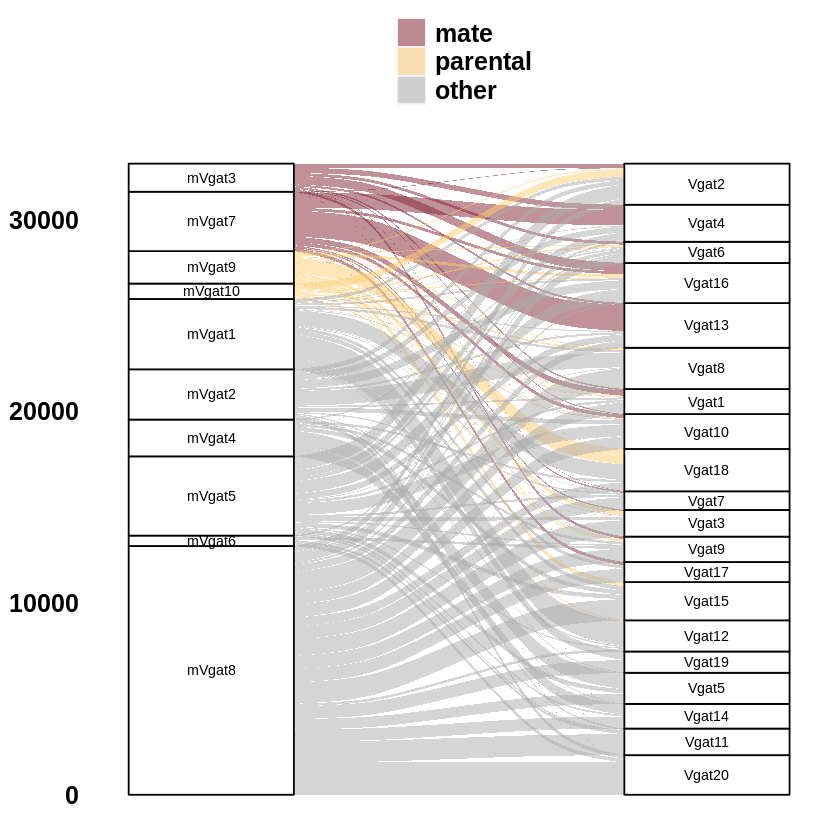

In [97]:
#201227
ggplot(data = Cell_number,
       aes(axis1 = merfish, axis2 = scRNAseq,y = number_adjust)) +
  scale_x_discrete(limits = c("merfish", "scRNAseq"), expand = c(.2, .05)) +
geom_alluvium(aes(fill = behavior)) +  
geom_stratum() +
  geom_text(stat = "stratum", aes(label = after_stat(stratum)),size=3,color="black",face="bold") +guides(fill=guide_legend(ncol=1))+
  theme(axis.title.y=element_blank(),axis.text.y=element_text(size=15,colour="black",face="bold"),axis.text.x=element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks=element_blank(),legend.position="top",legend.title=element_blank(), legend.text=element_text(size = 15,face="bold"))+scale_fill_manual(values=c("#832232","#FFCD73","gray67"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/female/alluvialfemale_otherincluded_select_comon_order_customthreshold.pdf",width=3,height=10)

In [28]:
#including male and female for dimplot

In [22]:
#201112 male
meta_merfish<-read.csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_male.csv",row.names=1)
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" )))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
Cell_type<-numeric()
for(i in 1:dim(MPOA.integrated@meta.data)[1]){
    Cell_type[i]<-new.ident[[MPOA.integrated@meta.data$seurat_clusters[i]]]
}
MPOA.integrated@meta.data$Cell_type<-Cell_type
#topor<-meta_topor$Cluster5
merfish<-meta_merfish$predicted.id
#201112 male
behavior<-numeric()
for(i in 1:dim(MPOA.integrated@meta.data)[1]){
    if(MPOA.integrated@meta.data$stim[i]=="AM" & grepl("Vgat",MPOA.integrated@meta.data$Cell_type[i]) & (merfish[i]=="mVgat10" )){
        behavior[i]<-"Mate_male"
    }else if(MPOA.integrated@meta.data$stim[i]=="AM" & grepl("Vgat",MPOA.integrated@meta.data$Cell_type[i]) & (merfish[i]=="mVgat3")){
        behavior[i]<-"Mate_male"
    }else if (MPOA.integrated@meta.data$stim[i]=="AM" & grepl("Vgat",MPOA.integrated@meta.data$Cell_type[i]) & merfish[i]=="mVgat9"){
        behavior[i]<-"Aggression_male"
    }else{ behavior[i]<-"others"}
}

In [23]:
behavior<-factor(behavior,levels=c("Mate_male","Aggression_male","others"))

In [33]:
MPOA.integrated@meta.data$behavior<-behavior
write.csv(MPOA.integrated@meta.data,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_log_behavaior_male.csv")

In [101]:
#201227 female
meta_merfish<-read.csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_female.csv",row.names=1)
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AF" )))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
Cell_type<-numeric()
for(i in 1:dim(MPOA.integrated@meta.data)[1]){
    Cell_type[i]<-new.ident[[MPOA.integrated@meta.data$seurat_clusters[i]]]
}
MPOA.integrated@meta.data$Cell_type<-Cell_type
#topor<-meta_topor$Cluster5
merfish<-meta_merfish$predicted.id
#201112 male
behavior<-numeric()
for(i in 1:dim(MPOA.integrated@meta.data)[1]){
    if(MPOA.integrated@meta.data$stim[i]=="AF" & grepl("Vgat",MPOA.integrated@meta.data$Cell_type[i]) & merfish[i]=="mVgat7" ){
        behavior[i]<-"Mate_female"
    }else if(MPOA.integrated@meta.data$stim[i]=="AF" & grepl("Vgat",MPOA.integrated@meta.data$Cell_type[i]) & merfish[i]=="mVgat3" ){
        behavior[i]<-"Mate_female"
    }else if(MPOA.integrated@meta.data$stim[i]=="AF" & grepl("Vgat",MPOA.integrated@meta.data$Cell_type[i]) & merfish[i]=="mVgat9" ){
        behavior[i]<-"Parenting_female"
    }else if(MPOA.integrated@meta.data$stim[i]=="AF" & grepl("Vgat",MPOA.integrated@meta.data$Cell_type[i]) & merfish[i]=="mVgat10" ){
        behavior[i]<-"Parenting_female"
    }else{ behavior[i]<-"others"}
}

In [102]:
behavior<-factor(behavior,levels=c("Mate_female","Parenting_female","others"))

In [103]:
#201227
MPOA.integrated@meta.data$behavior<-behavior
write.csv(MPOA.integrated@meta.data,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_log_behavaior_female.csv")

In [168]:
write.csv(MPOA.integrated@meta.data,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_log_behavaior.csv")

In [209]:
write.csv(MPOA.integrated@meta.data,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_SCT_behavaior.csv")

In [2]:
#you can start form here 201227
male.meta.data<-read.csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_log_behavaior_male.csv",row.names=1)
female.meta.data<-read.csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/metadata_log_behavaior_female.csv",row.names=1)

In [3]:
type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20")
#Cell_type<-factor(Cell_type,leveles=Cell_type)

In [4]:
cell_count<-numeric()
for(i in 1:length(type)){
    cell_count[i]<-dim(subset(male.meta.data,stim=="AM" & Cell_type==type[i]))[1]
}
Mate_male<-data.frame("Cell_type"=type)
count<-numeric()
for(i in 1:length(type)){
    count[i]<-dim(subset(male.meta.data,behavior=="Mate_male" & Cell_type==type[i] ))[1]
}
proportion<-100*count/sum(count)
corrected_count<-count/cell_count
corrected_proportion<-100*corrected_count/sum(corrected_count)
Mate_male$count<-count
Mate_male$proportion<-proportion
Mate_male$corrected_proportion<-corrected_proportion
Mate_male$behavior<-rep("Mate_male",length(type))

Aggression_male<-data.frame("Cell_type"=type)
count<-numeric()
for(i in 1:length(type)){
    count[i]<-dim(subset(male.meta.data,behavior=="Aggression_male" & Cell_type==type[i] ))[1]
}
proportion<-100*count/sum(count)
corrected_count<-count/cell_count
corrected_proportion<-100*corrected_count/sum(corrected_count)
Aggression_male$count<-count
Aggression_male$proportion<-proportion
Aggression_male$corrected_proportion<-corrected_proportion
Aggression_male$behavior<-rep("Aggression_male",length(type))


In [5]:
cell_count<-numeric()
for(i in 1:length(type)){
    cell_count[i]<-dim(subset(female.meta.data,stim=="AF" & Cell_type==type[i]))[1]
}
Mate_female<-data.frame("Cell_type"=type)
count<-numeric()
for(i in 1:length(type)){
    count[i]<-dim(subset(female.meta.data,behavior=="Mate_female" & Cell_type==type[i] ))[1]
}
proportion<-100*count/sum(count)
corrected_count<-count/cell_count
corrected_proportion<-100*corrected_count/sum(corrected_count)
Mate_female$count<-count
Mate_female$proportion<-proportion
Mate_female$corrected_proportion<-corrected_proportion
Mate_female$behavior<-rep("Mate_female",length(type))

Parenting_female<-data.frame("Cell_type"=type)
count<-numeric()
for(i in 1:length(type)){
    count[i]<-dim(subset(female.meta.data,behavior=="Parenting_female" & Cell_type==type[i] ))[1]
}
proportion<-100*count/sum(count)
corrected_count<-count/cell_count
corrected_proportion<-100*corrected_count/sum(corrected_count)
Parenting_female$count<-count
Parenting_female$proportion<-proportion
Parenting_female$corrected_proportion<-corrected_proportion
Parenting_female$behavior<-rep("Parenting_female",length(type))

In [6]:
social<-rbind(Aggression_male, Mate_male)
social<-rbind(social,Mate_female)
social<-rbind(social,Parenting_female)

In [7]:
# or
social_male<-rbind(Aggression_male, Mate_male)
social_female<-rbind(Parenting_female,Mate_female)

In [8]:
color<-numeric()
for(i in 1:dim(social)[1]){
   if(social$behavior[i]=="Aggression_male" | social$behavior[i]=="Parenting_female"){ color[i]<-"darkgoldenrod1"}
    else if(social$behavior[i]=="Mate_male" | social$behavior[i]=="Mate_female"){ color[i]<-"#000C3F"}
}
social$color<color

logical(0)

In [9]:
social$Cell_type<-factor(social$Cell_type,levels=rev(c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20")))
social$behavior<-factor(social$behavior,levels=rev(c("Aggression_male","Mate_male","Mate_female","Parenting_female")))

In [47]:
social$Cell_type<-factor(social$Cell_type,levels=c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))
social$behavior<-factor(social$behavior,levels=c("Aggression_male","Mate_male","Mate_female","Parenting_female"))

In [10]:
color_male<-numeric()
for(i in 1:dim(social_male)[1]){
   if(social_male$behavior[i]=="Aggression_male" ){ color_male[i]<-"deepskyblue"}
    else if(social_male$behavior[i]=="Mate_male" ){ color_male[i]<-"#000C3F"}
}
social_male$color_male<color_male

logical(0)

In [11]:
color_female<-numeric()
for(i in 1:dim(social_female)[1]){
   if(social_female$behavior[i]=="Parenting_female"){ color_female[i]<-"#FFCD73"}
    else if(social_female$behavior[i]=="Mate_female"){ color_female[i]<-"#832232"}
}
social_female$color_female<color_female

logical(0)

In [12]:
social_male$Cell_type<-factor(social_male$Cell_type,levels=c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))
social_male$behavior<-factor(social_male$behavior,levels=c("Mate_male","Aggression_male"))
social_female$Cell_type<-factor(social_female$Cell_type,levels=c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))
social_female$behavior<-factor(social_female$behavior,levels=c("Mate_female","Parenting_female"))

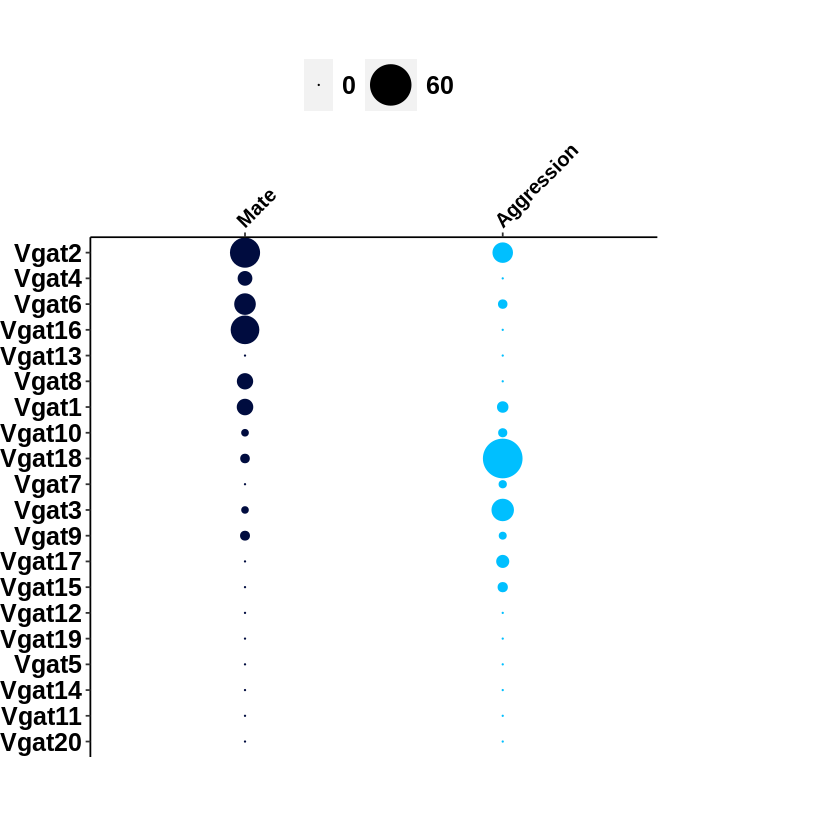

In [13]:
#201227
ggplot(social_male, aes( behavior,Cell_type)) + geom_point(aes(size =corrected_proportion),color=color_male) + 
scale_y_discrete(limits = rev(levels(social_male$Cell_type)))+scale_x_discrete(position = "top",labels=c("Mate_male" = "Mate","Aggression_male" = "Aggression")) +
#scale_color_gradient(low = "white", high = "darkblue",limits = c(-0.1,1.2),breaks=seq(0,1,0.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+scale_size_continuous(range = c(0,11),limits=c(0,60),breaks=seq(0,60,60))+scale_fill_manual(values=c("darkred","darkgoldenrod1"))+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,vjust=-2,angle =45, hjust = 0,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="top",legend.title=element_blank(), legend.text=element_text(size = 15,face="bold"),
        plot.margin = margin(30, 110, 50, 0),, axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 0.5))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/male/enrichmentbehavior_Vgat_log_male_custom_threshold.pdf",height=7, width=3 , paper = "letter")

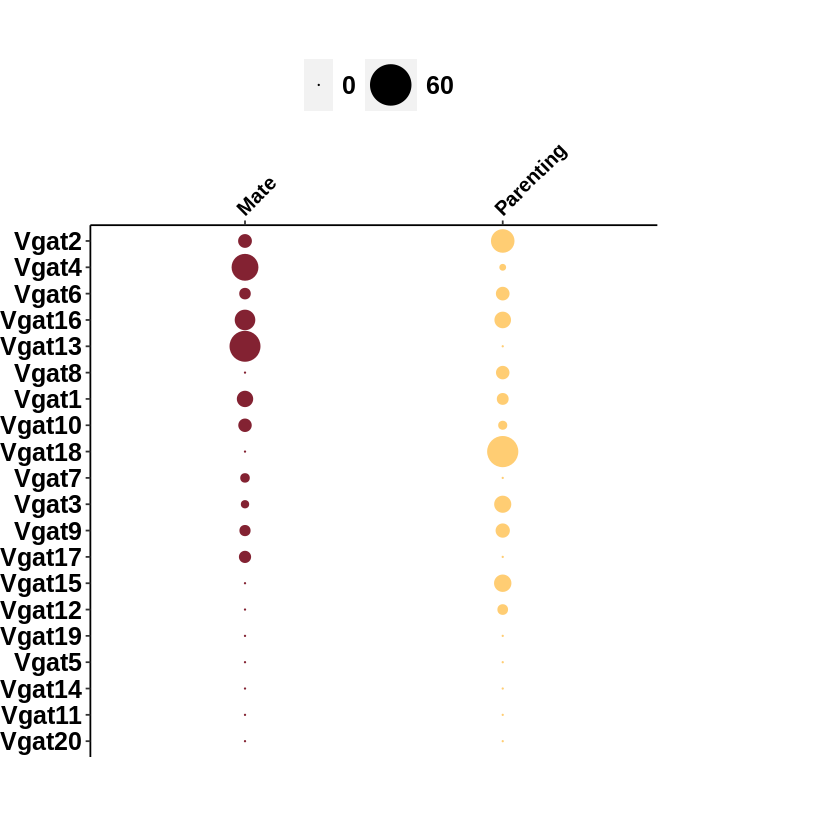

In [14]:
#201227
ggplot(social_female, aes( behavior,Cell_type)) + geom_point(aes(size =corrected_proportion),color=color_female) + 
scale_y_discrete(limits = rev(levels(social_female$Cell_type)))+scale_x_discrete(position = "top",labels=c("Mate_female" = "Mate","Parenting_female" = "Parenting")) +
#scale_color_gradient(low = "white", high = "darkblue",limits = c(-0.1,1.2),breaks=seq(0,1,0.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+scale_size_continuous(range = c(0,11),limits=c(0,60),breaks=seq(0,60,60))+scale_fill_manual(values=c("darkred","darkgoldenrod1"))+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,vjust=-2,angle =45, hjust = 0,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="top",legend.title=element_blank(), legend.text=element_text(size = 15,face="bold"),
        plot.margin = margin(30, 110, 50, 0),, axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 0.5))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/female/enrichmentbehavior_Vgat_log_female_custom_threshold.pdf",height=7, width=3 , paper = "letter")

# marker calculation

In [153]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")

new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
#MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" |stim=="AF")))
#MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [154]:
#mate vs non social
type2<-as.character(subset(Mate_male,proportion==0)$Cell_type)
type3<-as.character(subset(Aggression_male,proportion==0)$Cell_type)
type2<-intersect(type2,type3)
type1<-as.character(subset(Mate_male,proportion>0)$Cell_type)

In [155]:
Male.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM")))

In [156]:
DefaultAssay(Male.integrated) <- "RNA"

In [157]:
one.markers <- FindMarkers(Male.integrated, ident.1 = type1,ident.2 = type2,
                          ,print.bar = FALSE,min.cells.gene = 3, min.cells.group = 1,logfc.threshold = 0)

In [158]:
sort_marker<-one.markers[order(one.markers["p_val_adj"]),]
sort_marker<-subset(sort_marker,avg_logFC>0)
ratio<-sort_marker$pct.1/sort_marker$pct.2
sort_marker$ratio<-ratio
log_p<-log(sort_marker$p_val_adj)
sort_marker$log_p<--log_p

In [159]:
log_p<-log(sort_marker$p_val_adj)
sort_marker$log_p<--log_p

In [160]:
size<-numeric()
color<-numeric()
for(i in 1:dim(sort_marker)[1]){
    if(sort_marker$ratio[i]>10 & sort_marker$log_p[i]>10){size[i]<-6.5
                                                        color[i]<-"#000C3F"}
    else{size[i]<-1
       color[i]<-"black"}
}

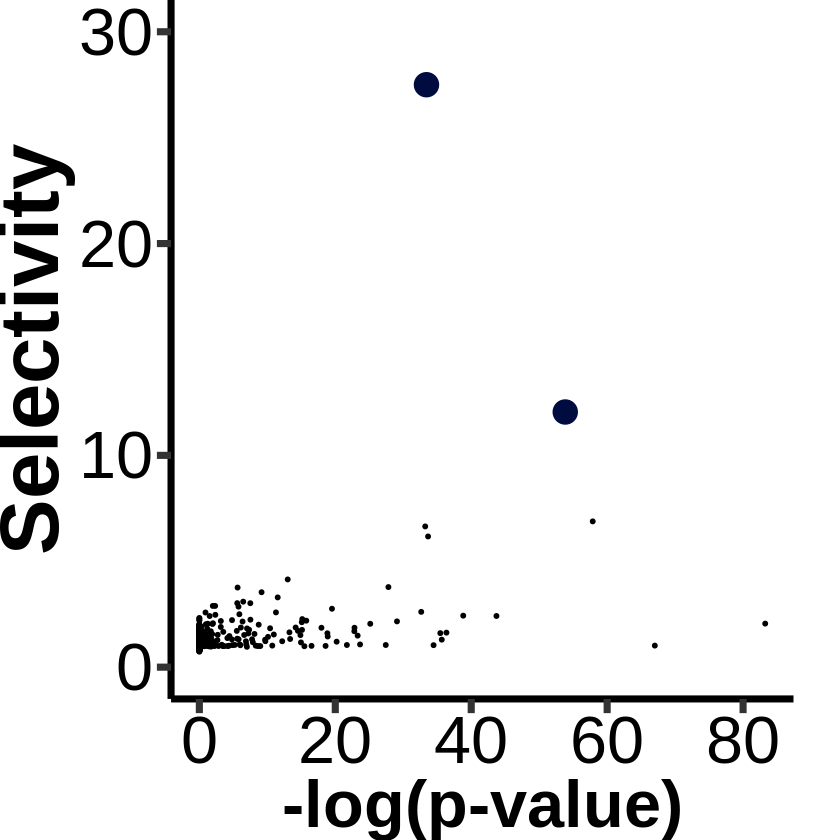

In [144]:
ggplot(sort_marker, aes(log_p, ratio)) + geom_point(size=size,color=color)+ylim(0,30)+xlab("-log(p-value)")+ylab("Selectivity")+
theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(0, 28, 0, 0))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/male/male_marker_in_mate cells.pdf",height=6, width=6 , paper = "letter")

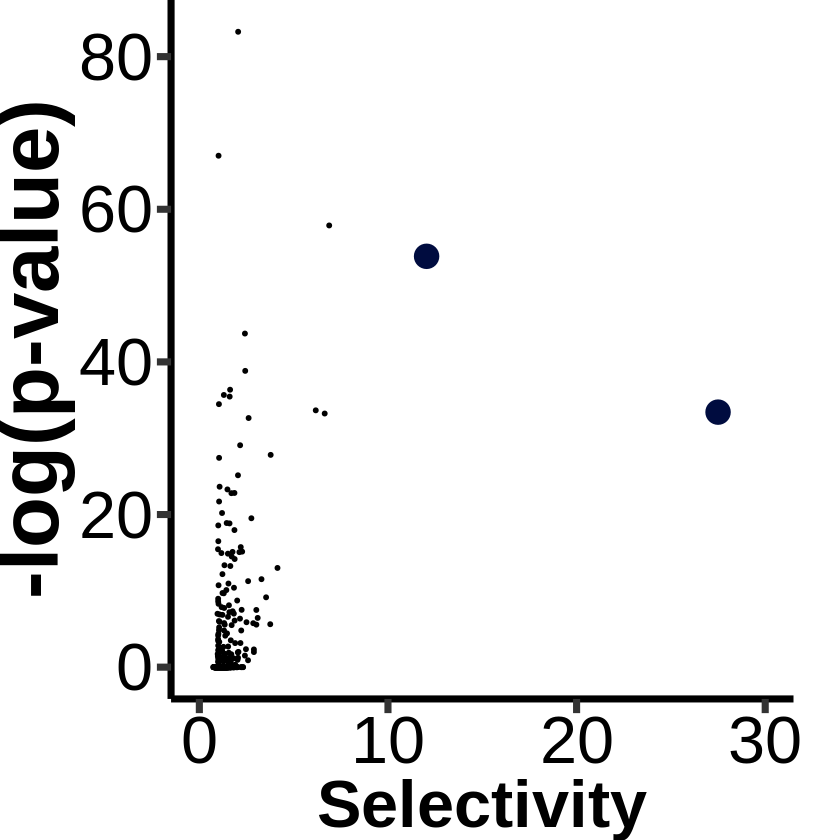

In [161]:
ggplot(sort_marker, aes(ratio,log_p)) + geom_point(size=size,color=color)+xlim(0,30)+ylab("-log(p-value)")+xlab("Selectivity")+
theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(0, 28, 0, 0))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/male/male_marker_in_mate cells_90.pdf",height=6, width=6 , paper = "letter")

In [125]:
write.csv(sort_marker,'/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/male/marker_confirmed.csv')

In [162]:
#female
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")

new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
#MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" |stim=="AF")))
#MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
Female.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AF")))
DefaultAssay(Male.integrated) <- "RNA"
type2<-as.character(subset(Mate_female,proportion==0)$Cell_type)
type3<-as.character(subset(Parenting_female,proportion==0)$Cell_type)
type2<-intersect(type2,type3)
type1<-as.character(subset(Mate_female,proportion>0)$Cell_type)

In [163]:
one.markers <- FindMarkers(Female.integrated, ident.1 = type1,ident.2 = type2,
                          ,print.bar = FALSE,min.cells.gene = 3, min.cells.group = 1,logfc.threshold = 0)
sort_marker<-one.markers[order(one.markers["p_val_adj"]),]
sort_marker<-subset(sort_marker,avg_logFC>0)
ratio<-sort_marker$pct.1/sort_marker$pct.2
sort_marker$ratio<-ratio
log_p<-log(sort_marker$p_val_adj)
sort_marker$log_p<--log_p

In [147]:
write.csv(sort_marker,'/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/female/marker_custom_threshold.csv')

In [165]:
sort_marker<-sort_marker[!(rownames(sort_marker) %in% c("Hmx2","St3gal1")), ]

In [166]:
size<-numeric()
color<-numeric()
for(i in 1:dim(sort_marker)[1]){
    if(sort_marker$ratio[i]>10 & sort_marker$log_p[i]>10){size[i]<-6.5
                                                        color[i]<-"#832232"}
    else{size[i]<-1
       color[i]<-"black"}
}

In [151]:
max(sort_marker$ratio)

[1] 24.8

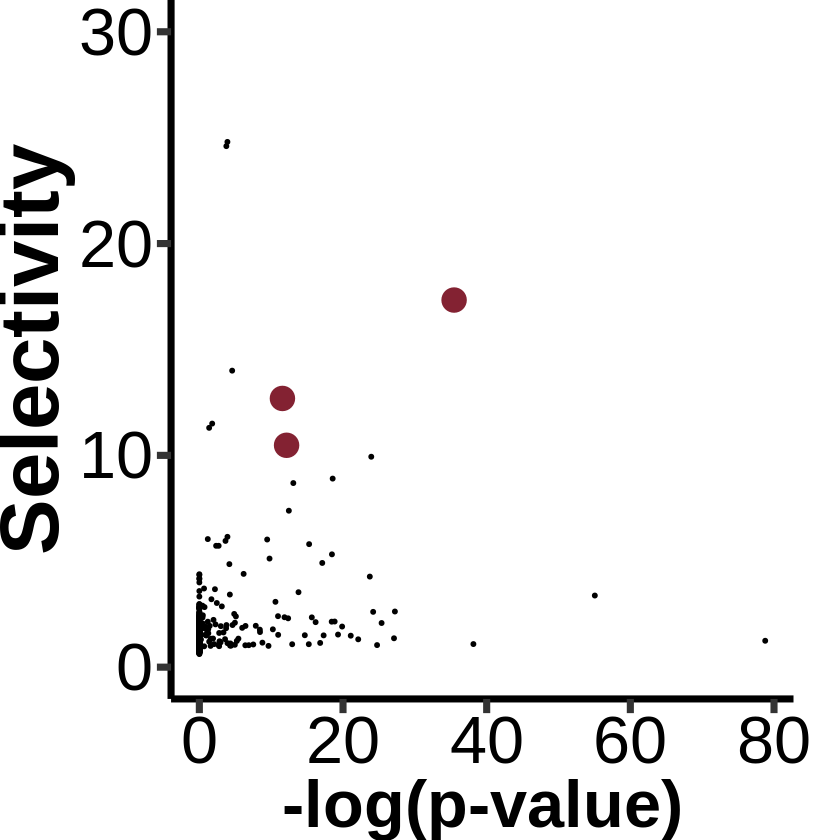

In [152]:
ggplot(sort_marker, aes(log_p, ratio)) + geom_point(size=size,color=color)+ylim(0,30)+xlab("-log(p-value)")+ylab("Selectivity")+
theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(0, 28, 0, 0))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/female/female_marker_in_mate cells_custom_threshold.pdf",height=6, width=6 , paper = "letter")

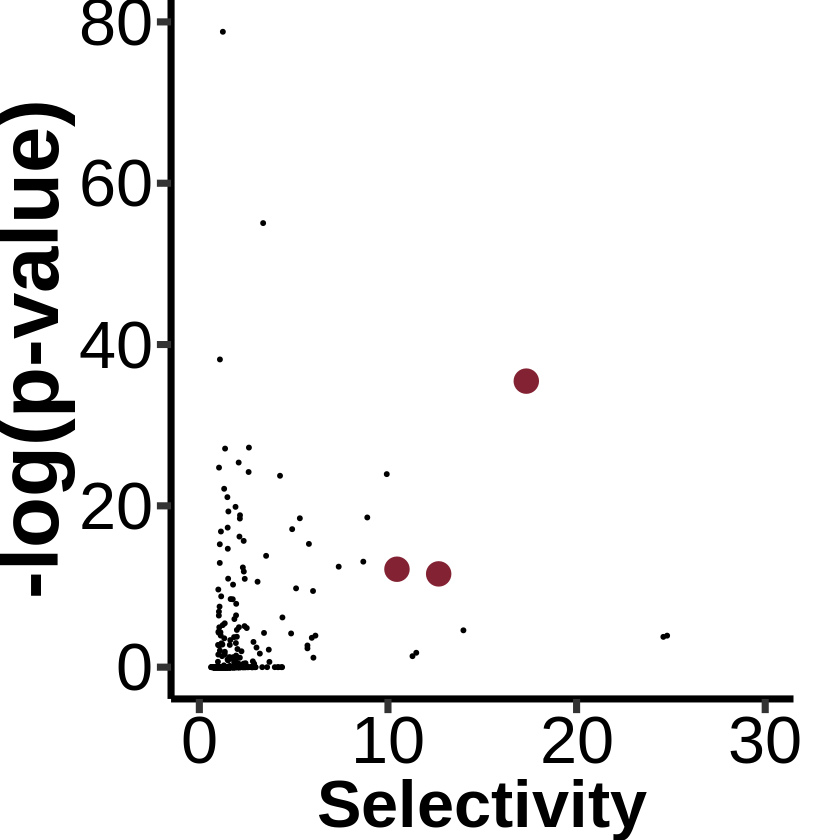

In [167]:
ggplot(sort_marker, aes(ratio,log_p)) + geom_point(size=size,color=color)+xlim(0,30)+ylab("-log(p-value)")+xlab("Selectivity")+
theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(0, 28, 0, 0))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/female/female_marker_in_mate cells_custom_threshold_90.pdf",height=6, width=6 , paper = "letter")

# Fos analysis

In [92]:
merfish.integrated<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/MERFISH_60.rds")

#female_barcode<-rownames(subset(merfish.integrated@meta.data,sex=="female" & stim=="Mate"))
#female_barcode<-rownames(subset(merfish.integrated@meta.data,sex=="female" & stim=="Parenting"))
male_barcode<-rownames(subset(merfish.integrated@meta.data,sex=="male" & stim=="Mate"))
#male_barcode<-rownames(subset(merfish.integrated@meta.data,sex=="male" & stim=="Aggression"))
merfish.integrated<-subset(merfish.integrated,cells=male_barcode)
#merfish.integrated<-subset(merfish.integrated,cells=female_barcode)
new.ident <- c("mVglu1","mVgat1","mVgat2","mVgat3","mVgat4","mVgat5","mVglu2","mVgat6","mVgat7","mVgat8","mVgat9","mVglu3","low","mVgat10","mVglu4","mVgat11","mVglu5","mVglu6","Mix1")#60
names(x = new.ident) <- levels(x =merfish.integrated)
merfish.integrated<- RenameIdents(object =merfish.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(merfish.integrated@assays$RNA@data[,which(Idents(object=merfish.integrated) %in% new.ident[i])]))}

In [93]:
threshold<-0
Cell_type<-rev(c("mVgat7","mVgat8","mVgat1","mVgat2","mVgat9","mVgat3","mVgat4","mVgat10","mVgat5","mVgat6","mVglu1","mVglu2","mVglu6","mVglu3","mVglu4","mVglu5"))
#initialize empty data frame
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(Cell_type)){
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode",sep=""))))
#replace "Fos" with gene of your interest
Cell_number_temp<- data.frame("type" =c(rep(Cell_type[i],L)))

Cell_number_temp$Fos<-merfish.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_type[i],"_barcode",sep="")))]
Cell_number<-rbind(Cell_number_temp,Cell_number)
}

as.factor(Cell_number$type)

as.factor(Cell_number$Cond)
Cell_number<-subset(Cell_number,Fos>threshold)

[1] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [10] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [19] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [28] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [37] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [46] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [55] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [64] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [73] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [82] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
   [91] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [100] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [109] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [118] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [127] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [136] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [145] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [154] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [163] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [172] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [181] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [190] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [199] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [208] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [217] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [226] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [235] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [244] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [253] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [262] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [271] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [280] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [289] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [298] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [307] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [316] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [325] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [334] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [343] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [352] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [361] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [370] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [379] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [388] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [397] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [406] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [415] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [424] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [433] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [442] mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7  mVgat7 
  [4

factor(0)
Levels:

In [94]:
mean(Cell_number$Fos)
sd(Cell_number$Fos)
mean(Cell_number$Fos)+1.645*sd(Cell_number$Fos) # since the other side has no meaning, 95 percentile
percent_95<-mean(Cell_number$Fos)+1.645*sd(Cell_number$Fos)

[1] 0.9155354

[1] 0.8009279

[1] 2.233062

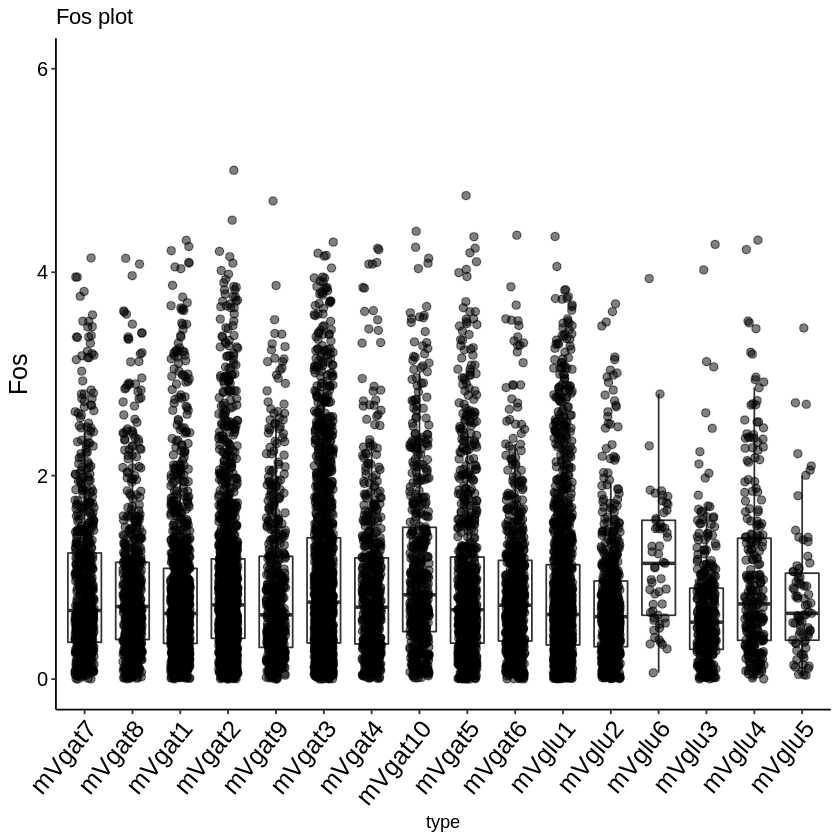

In [156]:
P<-ggplot(Cell_number,aes(x=type,y=Fos))
P +geom_boxplot(width = 0.7, size = 0.5,outlier.shape = NA) +
   geom_jitter(position=position_jitter(0.2), alpha = 0.5,size=2)+theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12,colour="black"),axis.text.x=element_text(size=15,angle = 50, hjust = 1,colour="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("Fos plot")+ylim(0,6)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/Fos_individual_Vgat_over2_male_60_mate_0.pdf",width=10,height=8)

In [74]:
proportion

ERROR: Error in eval(expr, envir, enclos): object 'proportion' not found


In [ ]:
#from below ext Fig3

In [95]:
#gender<-"female"
gender<-"male"

#behavior<-"Parenting"
#behavior<-"Aggression"
behavior<-"Mate"

merfish.integrated<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/MERFISH_60.rds")
barcode<-rownames(subset(merfish.integrated@meta.data,sex==gender & stim==behavior))

merfish.integrated<-subset(merfish.integrated,cells=barcode)

new.ident <- c("mVglu1","mVgat1","mVgat2","mVgat3","mVgat4","mVgat5","mVglu2","mVgat6","mVgat7","mVgat8","mVgat9","mVglu3","low","mVgat10","mVglu4","mVgat11","mVglu5","mVglu6","Mix1")#60
names(x = new.ident) <- levels(x =merfish.integrated)
merfish.integrated<- RenameIdents(object =merfish.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(merfish.integrated@assays$RNA@data[,which(Idents(object=merfish.integrated) %in% new.ident[i])]))}

In [96]:
# 210406
Cell_type<-rev(c("mVgat9","mVgat10","mVgat2","mVgat7","mVgat5","mVgat3","mVgat1","mVgat4","mVgat8","mVgat6","mVglu1","mVglu2","mVglu6","mVglu3","mVglu4","mVglu5"))
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =c(Cell_type))
# be careful with how you define factor and levels
as.factor(Cell_number$type)

levels(Cell_number$type)<-c("mVgat9","mVgat10","mVgat2","mVgat7","mVgat5","mVgat3","mVgat1","mVgat4","mVgat8","mVgat6","mVglu1","mVglu2","mVglu6","mVglu3","mVglu4","mVglu5")

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))/sum(Cell_number$len)} 
Cell_number$prop<-proportion

[1] mVglu5  mVglu4  mVglu3  mVglu6  mVglu2  mVglu1  mVgat6  mVgat8  mVgat4 
[10] mVgat1  mVgat3  mVgat5  mVgat7  mVgat2  mVgat10 mVgat9 
16 Levels: mVgat1 mVgat10 mVgat2 mVgat3 mVgat4 mVgat5 mVgat6 mVgat7 ... mVglu6

In [97]:
#using unaligned
threshold<-percent_95 # or user defined value
Fos_raw<-vector(mode="numeric",length=0)
Fos_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Fos_raw[i]<-100*sum(merfish.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_number$type[i],"_barcode",sep="")))]>threshold)/Cell_number$len[i]
    Fos_raw_number[i]<-sum(merfish.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_number$type[i],"_barcode",sep="")))]>threshold)                            }
Cell_number$Fos_raw<-Fos_raw
Cell_number$Fos_raw_number<-Fos_raw_number


Cell_number$Fos_raw_negative<-Cell_number$len-Cell_number$Fos_raw_number

In [98]:
total_raw<-sum(Cell_number$Fos_raw_number)
total_raw_negative<-sum(Cell_number$Fos_raw_negative)
average<-100*total_raw/(total_raw+total_raw_negative)

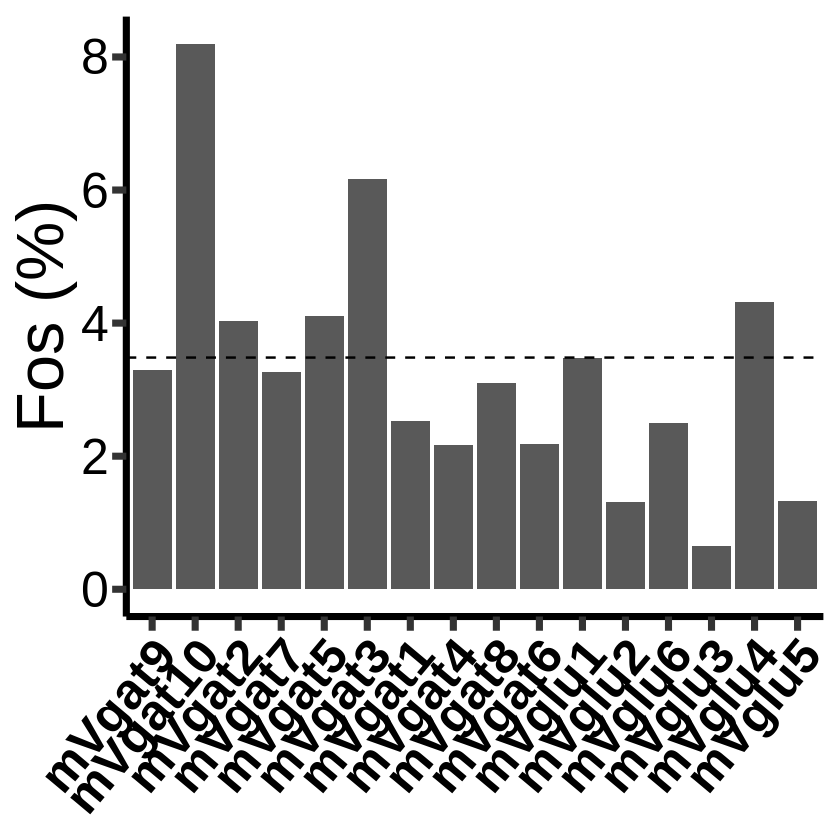

In [99]:
# proportion of c-fos_raw
ggplot(Cell_number,aes(x=type,y=Fos_raw))+geom_bar(stat = "identity")+ylab("Fos (%)")+
theme(axis.title.y=element_text(size=40),axis.title.x=element_blank(),axis.text.y=element_text(size=30,color="black"),axis.text.x=element_text(size=30,angle = 50, hjust = 1,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 10, 10, 10))+ geom_hline(yintercept=average, linetype="dashed", color = "black", size=0.7)
#dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/Fos_individual_Vgat_over2_male_proportion.pdf")
ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/",gender,"/Fos_individual_Vgat_over",threshold,"_proportion_",behavior,gender,threshold,"_60.pdf",sep=""),width=10,height=6,paper="letter")

In [100]:
#statistics
total_raw<-sum(Cell_number$Fos_raw_number)
total_raw_negative<-sum(Cell_number$Fos_raw_negative)
p<-numeric()
for(i in 1:dim(Cell_number)[1]){
    test = matrix(c(total_raw,total_raw_negative,Cell_number$Fos_raw_number[i],Cell_number$Fos_raw_negative[i]), ncol=2)
    temp_f<-fisher.test(test)
    p<-c(p,temp_f$p.value*dim(Cell_number)[1])
}

In [101]:
Cell_number$p<-p

In [102]:
write.xlsx2(Cell_number,file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/",gender,"/",gender,behavior,threshold,".xlsx",sep=""))

In [ ]:
# not useing below

In [98]:
#p value, female need to revise. only comparing mVgat9/3 and others
Cell_type<-c("mVgat6","mVgat1","mVgat9","mVgat3","mVgat8","mVgat10","mVgat4","mVgat5","mVgat7")
compare<-c(1,2)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p1<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(1,3)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p2<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(1,4)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p3<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(1,5)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p4<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(1,6)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p5<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(1,7)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p6<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(1,8)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p7<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(1,9)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p8<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)
p1
p2
p3
p4
p5
p6
p7
p8

[1] 0.577952

[1] 2.455575e-12

[1] 3.45587e-12

[1] 6.502047e-17

[1] 0.4927515

[1] 4.64783e-25

[1] 4.555078e-23

[1] 6.085882e-11

In [99]:
compare<-c(2,1)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p1<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(2,3)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p2<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(2,4)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p3<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(2,5)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p4<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(2,6)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p5<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(2,7)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p6<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(2,8)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p7<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)

compare<-c(2,9)
compare1<-subset(Cell_number,type==Cell_type[compare[1]])
compare2<-subset(Cell_number,type==Cell_type[compare[2]])
test = matrix(c(compare1$Fos_raw_number,compare1$Fos_raw_negative,compare2$Fos_raw_number,compare2$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
p8<-temp_f$p.value*(dim(Cell_number)[1]*(dim(Cell_number)[1]-1)/2)
p1
p2
p3
p4
p5
p6
p7
p8

[1] 0.577952

[1] 1.1621e-08

[1] 3.927148e-08

[1] 6.306727e-13

[1] 5.955348

[1] 7.076452e-21

[1] 5.716841e-19

[1] 2.772451e-07

In [92]:
Cell_number$type[compare[1]]

[1] mVgat1
Levels: mVgat6 mVgat1 mVgat9 mVgat3 mVgat8 mVgat10 mVgat4 mVgat5 mVgat7